In [90]:
import numpy as np
import matplotlib.pyplot as plt

import optimal_transport.apdamd.ot
from optimal_transport.greenkhorn.ot import OT as greenkhorn
from optimal_transport.sinkhorn.ot import OT as sinkhorn
from optimal_transport.apdamd.ot import OT as apdamd
from optimal_transport.tests.sample_problem import sample_gaussian_OT_exact, simple_problem
from optimal_transport.ot import cost
import timeit

In [66]:
# Create the problem
n = 1  # dim
N = 20  # number of points
Gaussian1 = (np.zeros(n), np.eye(n))
Gaussian2 = (np.ones(n), np.eye(n) + np.triu(np.ones(n)) * 0.5)
my_problem = sample_gaussian_OT_exact(N, n, (Gaussian1, Gaussian2))

In [91]:
epss = np.linspace(0.08, 0.1, 2)

In [92]:
res = np.load('./run.npz', allow_pickle=True)

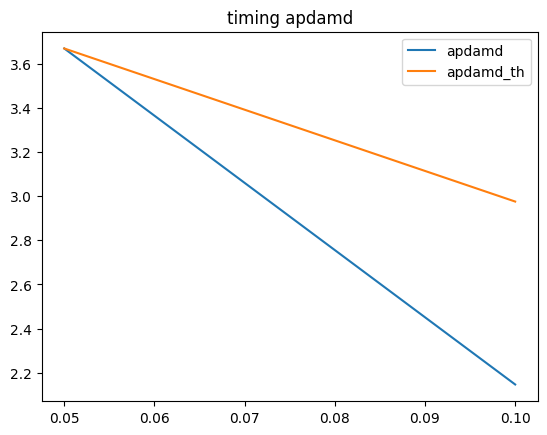

In [78]:
plt.plot(epss, np.log([res['timings_apdamd'][()][eps] for eps in epss]), label='apdamd')
plt.plot(epss, -np.log(epss) + np.log(epss[0]) + np.log(res['timings_apdamd'][()][epss[0]]), label='apdamd_th')
plt.title('timing apdamd')
plt.legend()

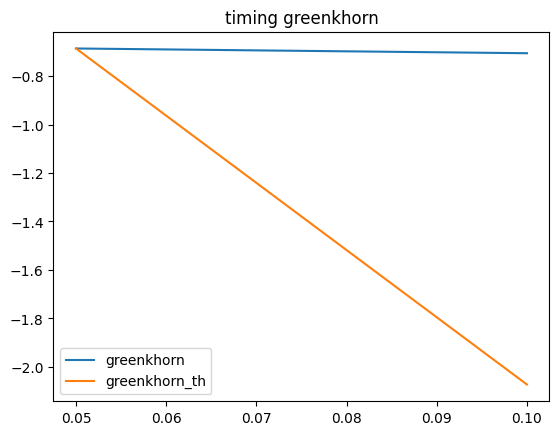

In [79]:
plt.plot(epss, np.log([res['timings_greenkhorn'][()][eps] for eps in epss]), label='greenkhorn')
plt.plot(epss, -2 * np.log(epss) + 2 * np.log(epss[0]) + np.log(res['timings_greenkhorn'][()][epss[0]]),
         label='greenkhorn_th')
plt.title('timing greenkhorn')
plt.legend()

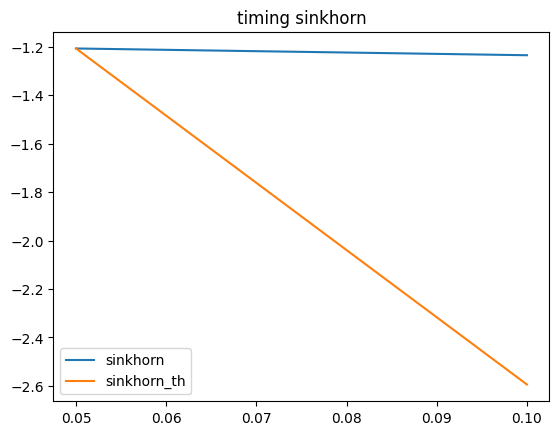

In [80]:
plt.plot(epss, np.log([res['timings_sinkhorn'][()][eps] for eps in epss]), label='sinkhorn')
plt.plot(epss, -2 * np.log(epss) + 2 * np.log(epss[0]) + np.log(res['timings_sinkhorn'][()][epss[0]]),
         label='sinkhorn_th')
plt.title('timing sinkhorn')
plt.legend()

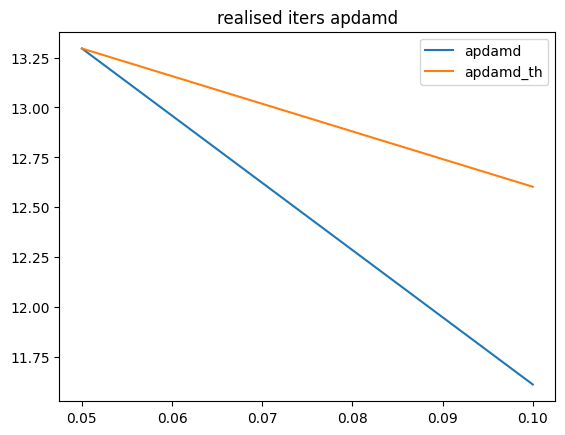

In [82]:
plt.plot(epss, np.log([res['realised_iters_apdamd'][()][eps] for eps in epss]), label='apdamd')
plt.plot(epss, -np.log(epss) + np.log(epss[0]) + np.log(res['realised_iters_apdamd'][()][epss[0]]),
         label='apdamd_th')
plt.title('realised iters apdamd')
plt.legend()



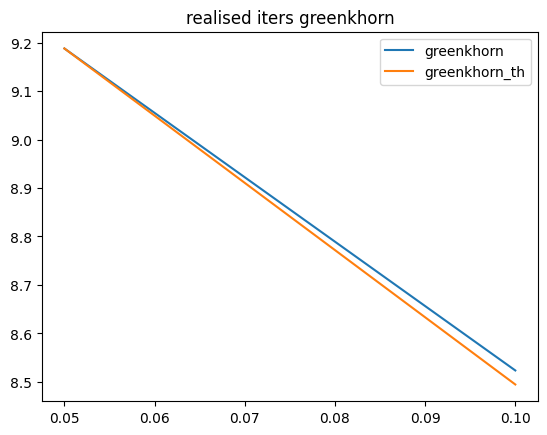

In [83]:
plt.plot(epss, np.log([res['realised_iters_greenkhorn'][()][eps] for eps in epss]), label='greenkhorn')
plt.plot(epss, -np.log(epss) + np.log(epss[0]) + np.log(res['realised_iters_greenkhorn'][()][epss[0]]),
         label='greenkhorn_th')
plt.title('realised iters greenkhorn')
plt.legend()




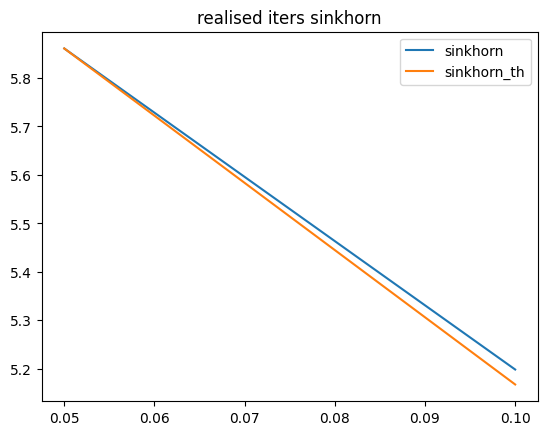

In [84]:
plt.plot(epss, np.log([res['realised_iters_sinkhorn'][()][eps] for eps in epss]), label='sinkhorn')
plt.plot(epss, -np.log(epss) + np.log(epss[0]) + np.log(res['realised_iters_sinkhorn'][()][epss[0]]),
         label='sinkhorn_th')
plt.title('realised iters sinkhorn')
plt.legend()




In [96]:
res['converge_greenkhorn'][()]

{0.08: Array(True, dtype=bool)}